<br>

# Prediction of Wind Turbine Power Production 
***

## Author: Silvio Dunst

<br>

### Project Description
Develop a Python code to accurately predict the power production of a wind turbine based on wind speed values. The wind speed values are in the data set file "powerproduction.txt". Use the linear regression to predict the power output or power production. Explain simple linear regression.
***

<br>

### What is a Regression?
A regression searches for the relationship between variables. One of the most important fields in statistics and machine learning is the regression analysis. Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them. There are many regression methods available like polynomial, ridge, lasso, elastic and linear regression. The linear regression is one of the most important and widely used regression techniques. It is a statistical approach for modelling the relationship between a dependent variable with a given set of independent variables. The simple linear regression is an approach for predicting a response using a single feature. The regression try to find a mathematical function/equation like `y=m*x+c` what maps the features or variables [1],[2]. 
***

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.set_option('display.max_rows',None)# show all th erows in the dataframe
df = pd.read_csv("powerproduction.txt")
df


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### Plotting the CSV file "powerproduction.txt" using a Dataframe

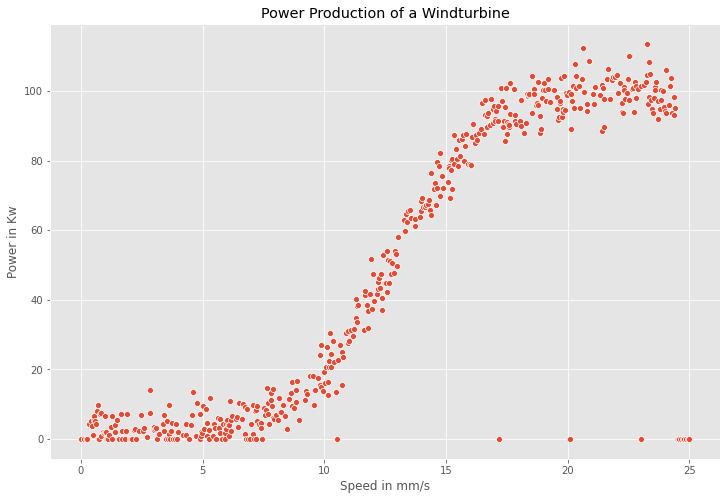

In [2]:
# Plot the CSV file "powerproduction.txt" using a Dataframe
plt.style.use('ggplot') # global parameters for pyplot for "ggplot" plot style
plt.rcParams['figure.figsize'] = 12, 8 # global parameters for pyplot increase the plot size
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.xlabel('Speed in mm/s')
plt.ylabel('Power in Kw');

<br>

### Prediction for the power production based on the wind speed
Using scikit sklearn package to make the prediction for the power production output[3].


In [15]:
# Dividing dataset in two components in X for inputs in our case input speed column 0 
# Defining data to work with the inputs (regressors, X) and output (predictor, 𝑦)

X1 = df.iloc[:,0:1].values # X=input/regressor[:] all row values,0 is for values from column 0['speed'] and 1 for values from column 1['power']
y1 = df.iloc[:,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel1 = LinearRegression()
regfit1 = linmodel1.fit(X1,y1)
regcoef1 = linmodel1.coef_
regscore1 = linmodel1.score(X1,y1)
regintercept1 = linmodel1.intercept_

print('Model 1')
print('Regression Coefficient/Slope:{}'.format(regcoef1))
print('Regression Score 𝑅²:{}'.format(regscore1))
print('Regression Intercept y axis or Offset:{}'.format(regintercept1))

# Different method to divide the dataset in two components in X for inputs in our case input speed column 0 
# try to fit a better model remove the first 5 and last 10 records from the dataset with the 0 values

listX = []
listX = df.iloc[5:490,0]
X2 = np.array(listX).reshape(-1,1)
y2 = df.iloc[5:490,1].values # y=output/predictor[:] all row values,1 is for values from column 1['power']

# Fitting the Linear Regression model from the scikit sklearn package to the dataset
linmodel2 = LinearRegression()
regfit2 = linmodel2.fit(X2,y2)
regcoef2 = linmodel2.coef_
regscore2 = linmodel2.score(X2,y2)
regintercept2 = linmodel2.intercept_

print('Model 2')
print('Regression Coefficient/Slope:{}'.format(regcoef2))
print('Regression Score 𝑅²:{}'.format(regscore2))
print('Regression Intercept y axis or Offset:{}'.format(regintercept2))

Model 1
Regression Coefficient/Slope:[4.91759567]
Regression Score 𝑅²:0.7289360258564073
Regression Intercept y axis or Offset:-13.899902630519634
Model 2
Regression Coefficient/Slope:[5.50789387]
Regression Score 𝑅²:0.8711036825756511
Regression Intercept y axis or Offset:-19.17279283754413


### Plotting 

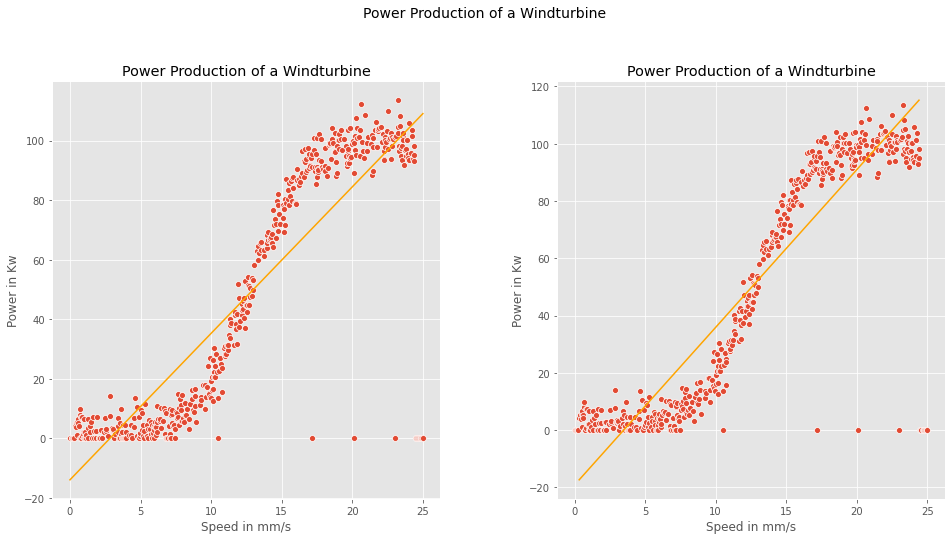

In [17]:
fig = plt.figure(figsize=(16,8))
title = fig.suptitle("Power Production of a Windturbine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X1,linmodel1.predict(X1),color='Orange')
plt.xlabel('Speed in mm/s')
plt.ylabel('Power in Kw');

ax1 = fig.add_subplot(1,2,2)
plt.title("Power Production of a Windturbine")
sns.scatterplot(x='speed',y='power',data=df)
plt.plot(X2,linmodel2.predict(X2),color='Orange')
plt.xlabel('Speed in mm/s')
plt.ylabel('Power in Kw');

### Power prediction

In [18]:
# 
y_predict = linmodel.predict(X2)
y_predict

array([-1.23016840e+01, -1.19328644e+01, -1.16869846e+01, -1.14361872e+01,
       -1.13132473e+01, -1.11903074e+01, -1.10673675e+01, -1.08214877e+01,
       -1.05756080e+01, -1.04526681e+01, -1.03297282e+01, -1.02067883e+01,
       -9.96090850e+00, -9.83796861e+00, -9.71502872e+00, -9.34620904e+00,
       -9.22326915e+00, -9.10032926e+00, -8.97738937e+00, -8.85444948e+00,
       -8.73150959e+00, -8.60856969e+00, -8.48562980e+00, -8.23975002e+00,
       -7.74799045e+00, -7.62505056e+00, -7.50211067e+00, -7.01035110e+00,
       -6.88741121e+00, -6.51367394e+00, -6.26779416e+00, -5.77603459e+00,
       -5.65309470e+00, -5.53015481e+00, -4.91545535e+00, -4.66957557e+00,
       -4.54663567e+00, -3.93193622e+00, -3.68605643e+00, -3.56311654e+00,
       -3.19429687e+00, -2.94841708e+00, -2.82547719e+00, -2.08783784e+00,
       -1.71901817e+00, -1.34528090e+00, -1.22234101e+00, -6.07641547e-01,
        7.05791124e-03,  1.29997803e-01,  6.21757369e-01,  8.67637153e-01,
        9.90577044e-01,  

### Wind Speed User Input

In [19]:
# Insert the wind speed 
windspeedinput = float(input('Insert the Wind speed in mm/s: '))

Insert the Wind speed in mm/s: 13.0


<br>

### Reference
***

[1] : https://realpython.com/linear-regression-in-python/

[2] : https://www.geeksforgeeks.org/linear-regression-python-implementation/?ref=lbp

[3] : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression


<br>

### End
***